In [1]:
import numpy as np, matplotlib.pyplot as plt, os

In [60]:
import matplotlib.colors as cl

In [2]:
import scipy.io as sio

In [3]:
cwd = os.getcwd()

In [4]:
Pavia_scene_dir = os.path.join(cwd, "MAT Files", "Pavia.mat")

In [5]:
PaviaSc_gt_dir = os.path.join(cwd, "GT Files", "Pavia_gt.mat")

In [6]:
print(Pavia_scene_dir)

/Users/suhasmathey/Hyper_Spectral Imaging/Hyper-Spectral-Image-Analysis/MAT Files/Pavia.mat


In [7]:
PaviaSc_data_mat = sio.loadmat(Pavia_scene_dir)

In [8]:
PaviaSc_gt_mat = sio.loadmat(PaviaSc_gt_dir)


## Pavia - Ground Truth Data

In [9]:
PaviaSc_gt_mat['pavia_gt'].astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Pavia Data Matrix

In [10]:
PaviaSc_data_mat['pavia'].astype(np.float64)

array([[[ 854.,  601.,  350., ..., 3664., 3636., 3643.],
        [ 527.,  642.,  575., ..., 3834., 3725., 3768.],
        [ 374.,  322.,  179., ..., 4318., 4311., 4321.],
        ...,
        [ 367.,  432.,  461., ..., 2582., 2504., 2512.],
        [ 261.,  311.,  366., ..., 2269., 2174., 2163.],
        [1059.,  678.,  403., ..., 2245., 2135., 2136.]],

       [[1060.,  909.,  596., ..., 2963., 2967., 2974.],
        [ 707.,  757.,  646., ..., 3508., 3534., 3648.],
        [ 143.,  419.,  417., ..., 4650., 4612., 4638.],
        ...,
        [ 465.,  547.,  537., ..., 3156., 3052., 3035.],
        [ 884.,  615.,  401., ..., 2792., 2667., 2639.],
        [ 756.,  401.,  213., ..., 2600., 2484., 2445.]],

       [[ 532.,  545.,  594., ..., 1675., 1653., 1680.],
        [ 523.,  491.,  321., ..., 3339., 3349., 3403.],
        [ 816.,  681.,  369., ..., 4627., 4600., 4650.],
        ...,
        [ 408.,  539.,  436., ..., 3099., 3005., 3006.],
        [ 393.,  447.,  476., ..., 3172., 304

In [11]:
data = PaviaSc_data_mat['pavia']

In [12]:
gt_data = PaviaSc_gt_mat['pavia_gt']

In [13]:
indices = np.where(gt_data == 0)

In [14]:
bg_indices = list(zip(indices[0], indices[1]))

**Create a mask to remove the background pixels**

In [15]:
mask = gt_data != 0 

In [16]:
masked_data = data[mask, :].T

In [17]:
data.shape

(1096, 715, 102)

In [18]:
masked_data.shape

(102, 148152)

In [19]:
n_classes = np.max(gt_data) + 1

### Creating Colormap

In [79]:
# colors_10 = ["#000000", "#FFFF74", "#FF9BFF", "#00D3FF", "#E2630D", "#007E00", "#0050E6", "#AC0047", "#00FFC8", "#006468"]

In [81]:
# my_c10map = cl.ListedColormap(colors_10, name="disti_c10map")

In [82]:
# plt.colormaps.register(cmap=my_c10map)

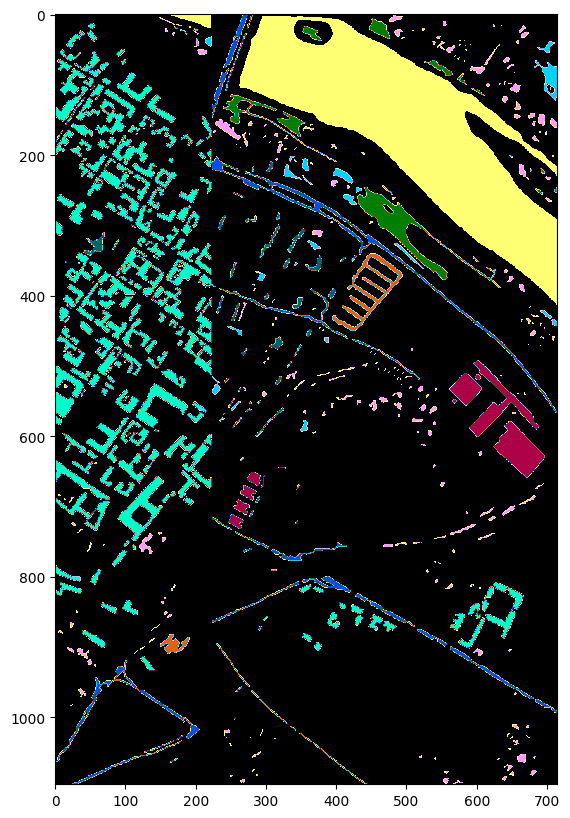

In [83]:
plt.figure(figsize=(10, 10))
plt.imshow(gt_data, cmap=my_c10map)
plt.show()

In [84]:
data.shape[0]

1096

In [85]:
data_mat = data.reshape(-1, data.shape[2]).T

In [86]:
data_mat.shape

(102, 783640)

In [87]:
gt_vec = gt_data.flatten()

In [88]:
np.sort(np.unique(gt_vec))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
indices = np.where(gt_vec == 1)[0]

In [90]:
len(indices)

65971

In [91]:
indices[1]

162

In [92]:
rand_idx1 = np.random.choice(indices, 300, False)

In [93]:
len(rand_idx1)

300

In [94]:
rand_idx1

array([112809,  46941,  86922,  69840,  67753, 138556,  33255, 117190,
        59683, 196557, 265948,  77736,  92028,  65482,  97030, 157831,
        90453, 220122, 109870, 230199, 240228,  97718,  82035,  18172,
       160760,  95483, 110563,   7542,  98460,  62548,  51877, 185068,
        41050,  72492,   7368,  58244, 192939,  85642, 236602,  96916,
       215194, 122064, 244520,  10345, 192944,  81919, 225174, 217234,
        26888, 210859,  76112, 209352, 165732, 114864,   5304, 131387,
       124852, 136518,  88287,  92580, 160761, 155144, 245934, 234456,
       268081,  31038,  99939,  95676,  74120,  79714,  61085,  51235,
        13903,  49774,  86237,  41867, 225838,  43200, 158553, 122052,
        86967, 190744, 146399, 238069,  20335,  48216,  59769, 199439,
       201603,  79119,  29779, 225131, 141337,  67489, 154993, 192285,
        24015, 107159,  11019, 202193, 147198,  62492, 123489,  44665,
        19607,  13806, 225202,  93405, 100613,  51843,  65480,   3051,
      

In [95]:
selec_data = data_mat[:, rand_idx1]

In [96]:
selec_data.shape

(102, 300)

In [97]:
mean_vector = np.mean(selec_data, axis=1)

In [98]:
mean_vector.shape

(102,)

## Mean Classifier

In [99]:
class MeanClassifier:
    def __init__(self, mean_vectors):

        """
        Parameters:
            mean_vectors: List containing the mean vector for each valid label.
        """
        
        self.mean_vectors = mean_vectors

In [100]:
def fit_mean(data, gt_data):

    """
    Parameters:
        data: A 3D array of shape (height, width, bands) representing the data cube
        gt_data: A 2D array of shape (height, width) representing the ground truth labels, 0 reperesenting the background

    Returns:
        MeanClassifier: An instance of MeanClassifier with computed mean vectors
    """

    data_mat = data.reshape(-1, data.shape[2]).T
    gt_vec = gt_data.flatten()
    gt_labels = np.sort(np.unique(gt_vec))
    valid_labels = gt_labels[gt_labels != 0]

    mean_vectors = []
    for label in valid_labels:
        indices = np.where(gt_vec == label)[0]

        idx_size = min(3000, len(indices))

        selected_indices = np.random.choice(indices, idx_size, False)
        selected_points = data_mat[:, selected_indices]

        mean_vector = np.mean(selected_points, axis=1)
        mean_vectors.append(mean_vector)

    return MeanClassifier(mean_vectors)

In [101]:
mean_classifier = fit_mean(data, gt_data)

In [102]:
mean_classifier.mean_vectors[1]

array([ 536.41166667,  451.03933333,  363.24866667,  313.05366667,
        293.82766667,  293.86266667,  297.70033333,  292.24766667,
        284.03866667,  277.89233333,  271.45      ,  259.73333333,
        251.05166667,  245.616     ,  240.57466667,  233.84533333,
        233.636     ,  237.081     ,  242.08666667,  251.73133333,
        267.047     ,  290.33633333,  317.69033333,  348.18466667,
        384.548     ,  421.54666667,  446.65033333,  462.57933333,
        473.20766667,  484.481     ,  494.84      ,  496.973     ,
        490.04066667,  478.47266667,  461.277     ,  439.39933333,
        416.29833333,  396.23933333,  381.228     ,  370.86433333,
        361.37433333,  353.067     ,  347.63533333,  343.32433333,
        338.998     ,  332.42366667,  322.952     ,  313.75566667,
        308.59366667,  304.18133333,  302.82633333,  301.00766667,
        295.88066667,  288.818     ,  278.76766667,  268.64533333,
        260.082     ,  250.391     ,  240.00033333,  230.545  

In [103]:
def classify(data, classifier):
    """
    Parameters:
        data: A 2D array of shape (bands, n_pixels), where each column is a pixel
        classifier: An object with attribute 'mean_vectors', a list of 1D numpy arrays
        
    Returns:
        pixel_classes: A 1D array of length n_pixels containing predicted pixel labels 
    """

    Dnorms = np.sum(np.square(data), axis=0)
    resids = []
    for Uc in classifier.mean_vectors:
        innerprod = np.dot(data.T, Uc)
        Uc_norm = np.sum(np.square(Uc), axis=0)

        distances = np.sqrt(np.abs(Dnorms - 2 * innerprod + Uc_norm))
        resids.append(distances)


    resids = np.array(resids)
    pixel_classes = np.argmin(resids, axis=0) + 1

    return pixel_classes

In [104]:
mean_class_labels = classify(masked_data, mean_classifier)

In [105]:
np.unique(mean_class_labels)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [106]:
mean_class_labels.shape

(148152,)

In [107]:
clustermap = np.zeros(data.shape[:2])

In [108]:
clustermap[mask] = mean_class_labels

In [109]:
np.unique(clustermap)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [110]:
clustermap.shape

(1096, 715)

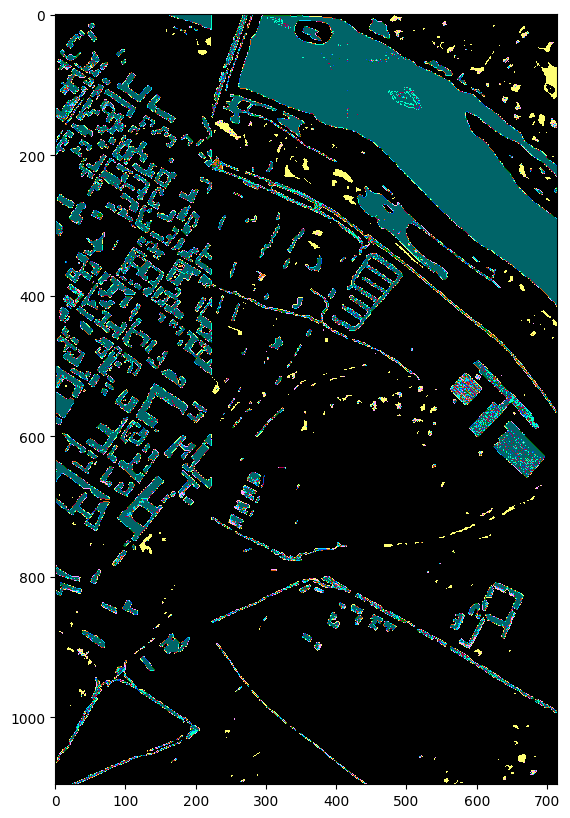

In [111]:
plt.figure(figsize=(10, 10))
plt.imshow(clustermap, cmap=my_c10map)
plt.show()